In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

In [ ]:
dataset = keras.datasets.mnist
class_names = ['Zero', 'one', 'two', 'three', 'Four', 'Five', 'Six', 'seven', 'Eight', 'nine']
(x_train, y_train), (x_test, y_test) = dataset.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


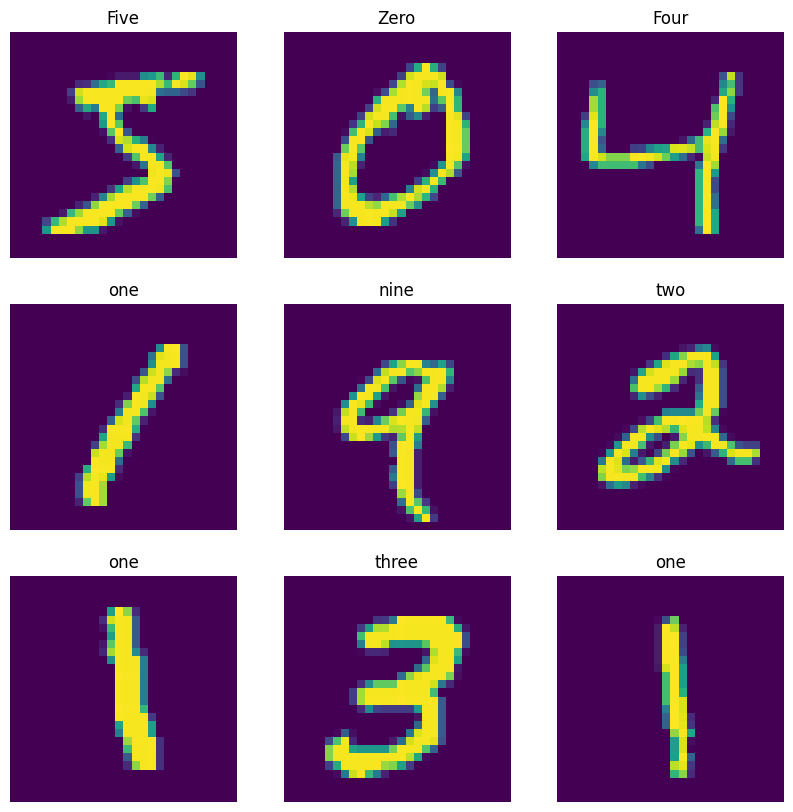

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")

In [ ]:
x_train = x_train / 255
x_test = x_test / 255


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, callbacks=[keras.callbacks.EarlyStopping(patience=2)])


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.9689

1875/1875 [==============================] - 343s 182ms/step - loss: 0.1046 - accuracy: 0.9689
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9878

1875/1875 [==============================] - 328s 175ms/step - loss: 0.0390 - accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9921

1875/1875 [==============================] - 324s 173ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9934

1875/1875 [==============================] - 320s 171ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9954

1875/1875 [==============================] - 333s 177ms/step - loss: 0.0139 - accuracy: 0.9954


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 41ms/step - loss: 0.0346 - accuracy: 0.9909


[0.034586794674396515, 0.9908999800682068]

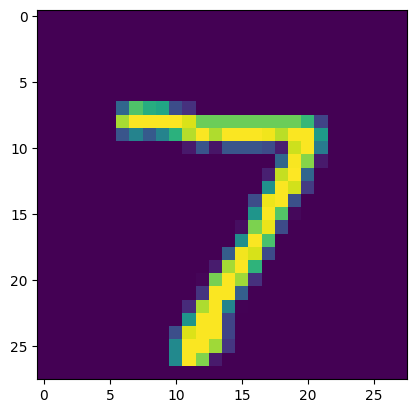

In [ ]:
sample_img = x_test[0]
sample_img.shape
plt.imshow(sample_img)

In [ ]:
img = np.expand_dims(sample_img, axis=0)
img.shape


(1, 28, 28, 1)

In [ ]:
pred = model.predict(img)
pred


1/1 [==============================] - 0s 112ms/step


array([[1.6712467e-09, 1.5251614e-07, 1.8241173e-09, 3.8575216e-08,
        7.3191364e-10, 1.2357578e-09, 3.1007209e-13, 9.9999988e-01,
        2.0718644e-11, 2.6906784e-08]], dtype=float32)

In [ ]:
print(f"Predicted: {class_names[np.argmax(pred)]}\nActual: {class_names[y_test[0]]}")


Predicted: seven
Actual: seven


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)                1